In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.style.use("ggplot")

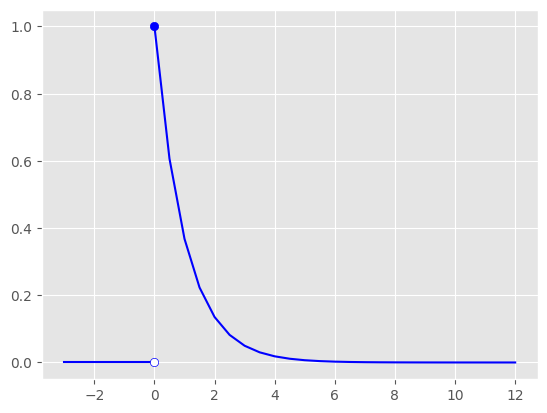

In [26]:
exp_rv = scipy.stats.expon(loc = 0,scale = 1)
x_l = np.linspace(-3, 0, 25)
p_x_l = np.zeros_like(x_l)
x_r = np.linspace(0, 12, 25)
p_x_r = exp_rv.pdf(x_r)
plt.plot(x_l, p_x_l, color = 'blue' )
plt.plot(x_r, p_x_r, color = 'blue')
plt.scatter([0], [0], color = 'white', edgecolors = 'blue', zorder = 3) 
plt.scatter([0], [1],color = 'blue' , zorder = 3 )

In [46]:
data = exp_rv.rvs(25)
data


array([1.02057816, 0.01101017, 2.52107421, 0.32009571, 5.43606079,
       0.35038199, 0.06071316, 0.50934487, 0.54236865, 0.52685936,
       1.35767633, 0.84457576, 2.46900698, 0.17479953, 0.00691618,
       0.07176448, 0.41745191, 0.94913852, 0.15253823, 0.10523342,
       0.78033837, 0.42455214, 0.96445198, 0.03612358, 0.43948707])

a)

In [ ]:
sort_arr = np.sort(data)
l = sort_arr.max() - sort_arr.min() #размах выборки
print(l)
med = scipy.ndimage.median(sort_arr) # медиана(13 элемент)
print(med) 
moda = scipy.stats.mode(sort_arr) #мода
print(moda)
as_coef = (scipy.stats.moment(sort_arr, moment = 3))/(scipy.stats.moment(sort_arr, moment = 2)**1.5) #коэффициент ассиметрии
print(as_coef)


5.42914461040093
0.43948707481907895
ModeResult(mode=np.float64(0.006916176471407547), count=np.int64(1))
2.108807802360343


b)

0.15253822516302512
0.43948707481907895
0.9491385217644466
0.7966002966014214
2.144038966666579
-1.042362219739107
[2.46900698 2.52107421 5.43606079]


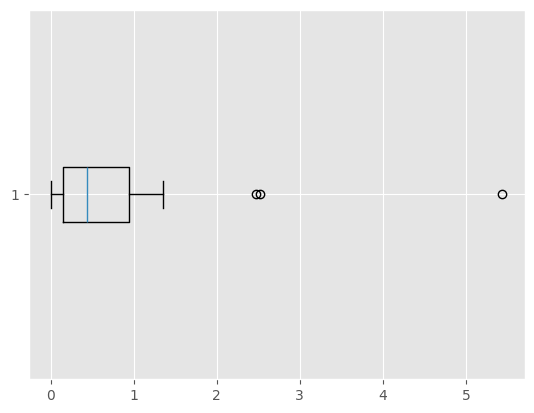

In [48]:
# Boxplot
q1 = np.quantile(sort_arr, 0.25)
q3 = np.quantile(sort_arr, 0.75)
IQR = q3 - q1
up_outlier = q3 + 1.5 * IQR
low_outlier = q1 - 1.5 * IQR
outliers = sort_arr[(sort_arr < low_outlier) | (sort_arr > up_outlier)]


print(q1,
      med,
      q3,
      IQR,
      up_outlier,
      low_outlier,
      outliers, sep = "\n")

plt.boxplot(sort_arr, vert = False)
plt.show()

(array([0.77360253, 0.03683822, 0.07367643, 0.        , 0.03683822]),
 array([0.00691618, 1.0927451 , 2.17857402, 3.26440294, 4.35023186,
        5.43606079]),
 <BarContainer object of 5 artists>)

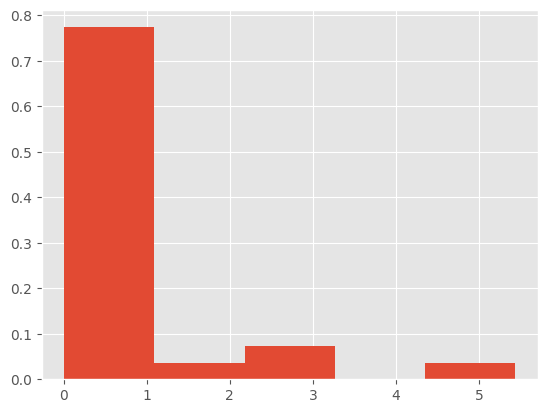

In [118]:
#Гистограмма
k = int((1 + (np.log2(25))))
delta = round(l/k)
delta



plt.hist(sort_arr, bins = k, density = True)

([<matplotlib.axis.XTick at 0x1aa7ac2ead0>,
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5')])

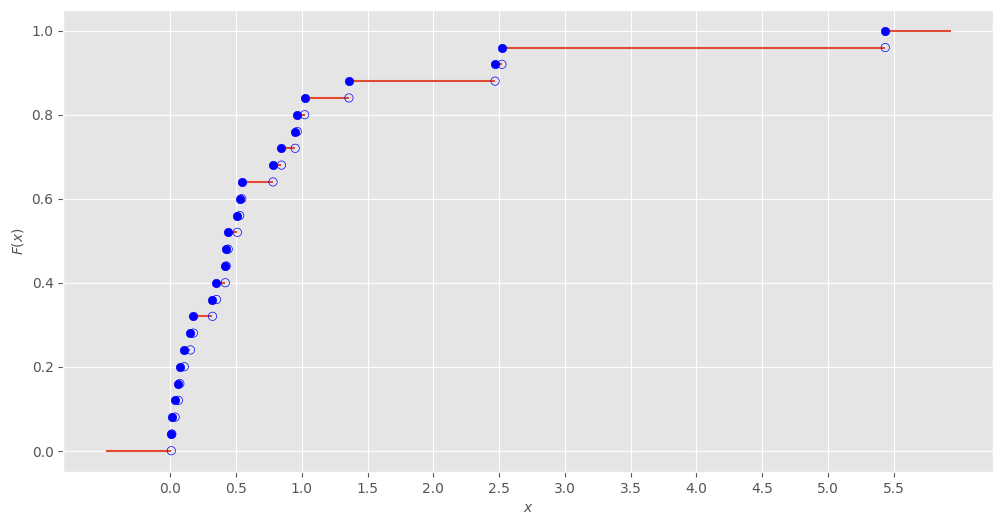

In [100]:
#эмпирическая функция распределения
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sort_arr)
x = np.unique(sort_arr)
y = np.nan
x_min = ecdf.x[1]
x_max = ecdf.x[-1]
plt.figure(figsize= (12,6))


plt.hlines(y=ecdf.y[:-1], xmin = ecdf.x[:-1], xmax = ecdf.x[1:])
plt.hlines(y=1, xmin=x_max, xmax = x_max + 0.5 )
plt.hlines(y=0, xmin=x_min -0.5, xmax=x_min)
plt.scatter(ecdf.x[1:], ecdf.y[:-1], facecolors = 'none', edgecolors = 'b', zorder = 2)
plt.scatter(ecdf.x, ecdf.y, color = 'blue', edgecolors = 'blue', zorder = 2)
plt.ylabel('$F(x)$', fontsize = 10)

#plt.xlim(x_min - 1, x_max + 1)
plt.xlabel('$x$', fontsize = 10)
plt.xticks(np.arange(0, 6, 0.5))


c)

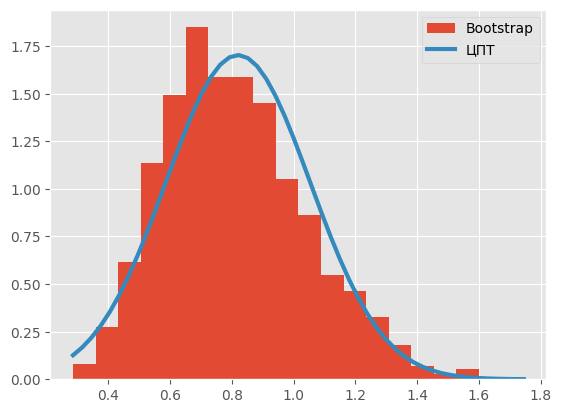

In [112]:
# bootstrap
N_boot = 1000
boot_mean = []
for i in range(N_boot):
    sub = np.random.choice(sort_arr, size = 25, replace = True)
    boot_mean.append(np.mean(sub))

#ЦПТ
mu = np.mean(sort_arr)
sigm = np.std(sort_arr, ddof = 1)

n_dist = scipy.stats.norm(mu, sigm/np.sqrt(25))

plt.hist(boot_mean, bins = 20, density=True, label = 'Bootstrap')
x = np.linspace(min(boot_mean), max(boot_mean), 50)
y = n_dist.pdf(x)
plt.plot(x, y, lw = 3, label = 'ЦПТ')
plt.legend()


d)

2.228866119812364
0.053


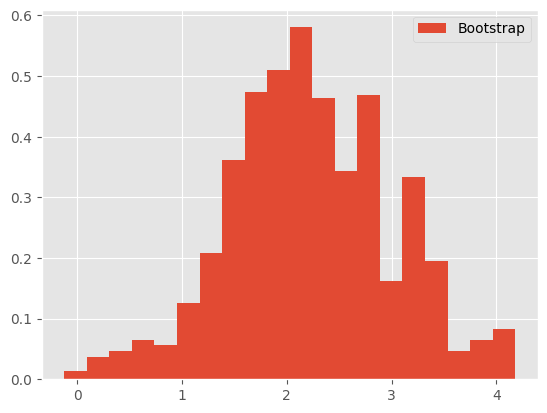

In [111]:
N_boot = 1000
boot_ = []
for i in range(N_boot):
    sub = np.random.choice(sort_arr, size = 25, replace = True)
    boot_.append((scipy.stats.moment(sub, moment = 3))/(scipy.stats.moment(sub, moment = 2)**1.5))
plt.hist(boot_, bins = 20, density=True, label = 'Bootstrap')
plt.legend()
print(np.mean(boot_))

prob = np.mean(np.array(boot_)< 1)
print(prob)

e)

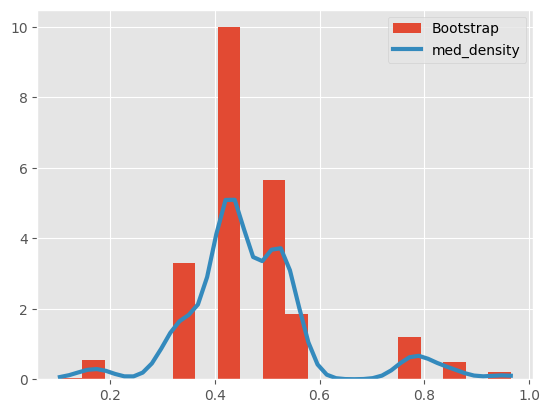

In [114]:
N_boot = 1000
boot_med = []
for i in range(N_boot):
    sub = np.random.choice(sort_arr, size = 25, replace = True)
    boot_med.append(scipy.ndimage.median(sub))
    
func = scipy.stats.gaussian_kde(boot_med)
x_med = np.linspace(min(boot_med), max(boot_med), 50)
y_med = func(x_med)

plt.hist(boot_med, bins = 20, density=True, label = 'Bootstrap')
plt.plot(x_med, y_med, lw = 3, label = 'med_density')
plt.legend()




